<a href="https://colab.research.google.com/github/udlbook/udlbook/blob/main/Notebooks/Chap13/13_3_Neighborhood_Sampling.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Notebook 13.3: Neighborhood sampling**

This notebook investigates neighborhood sampling of graphs as in figure 13.10 from the book.

Work through the cells below, running each cell in turn. In various places you will see the words "TO DO". Follow the instructions at these places and make predictions about what is going to happen or write code to complete the functions.

Contact me at udlbookmail@gmail.com if you find any mistakes or have any suggestions.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import networkx as nx

Let's construct the graph from figure 13.10, which has 23 nodes.

In [2]:
# Define adjacency matrix
A = np.array(
    [
        [0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
        [1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
        [1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
        [1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0],
        [0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
        [0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1],
        [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1],
        [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0],
        [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0],
        [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1],
        [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0],
    ]
)
print(A)

[[0 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [1 0 1 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [1 1 0 1 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [1 0 1 0 1 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 1 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 1 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 1 0 0 0 1 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 1 1 1 1 0 0 0 1 0 0 1 0 0 0 0 0 0 0 0 0]
 [0 1 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 1 1 0 0 0 1 0 1 0 0 1 1 0 0 0 1 0 0 0 0 0 0]
 [0 0 0 0 0 0 1 1 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 1 0 0 0 0 1 1 1 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 1 1 0 0 1 0 0 1 1 0 0 0 0 0]
 [0 0 0 0 0 0 0 1 0 0 0 0 1 0 0 0 0 1 1 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 1 0 0 0 1 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 1 0 0 1 0 1 0 0 1 0 0 0]
 [0 0 0 0 0 0 0 0 0 1 0 1 1 0 0 1 0 1 0 1 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0 1 0 1 0 1 1 1]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 1 0 0 0 0 1]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 0 0 0 1 0 0]
 [0 0 0 0 0 0 0 0 0 

In [3]:
# Routine to draw graph structure, highlighting original node (brown in fig 13.10)
# and neighborhood nodes (orange in figure 13.10)
def draw_graph_structure(adjacency_matrix, original_node, neighborhood_nodes=None):
    G = nx.Graph()
    n_node = adjacency_matrix.shape[0]
    for i in range(n_node):
        for j in range(i):
            if adjacency_matrix[i, j]:
                G.add_edge(i, j)

    color_map = []

    for node in G:
        if original_node[node]:
            color_map.append("brown")
        else:
            if neighborhood_nodes[node]:
                color_map.append("orange")
            else:
                color_map.append("white")

    nx.draw(G, nx.spring_layout(G, seed=7), with_labels=True, node_color=color_map)
    plt.show()

Output layer:


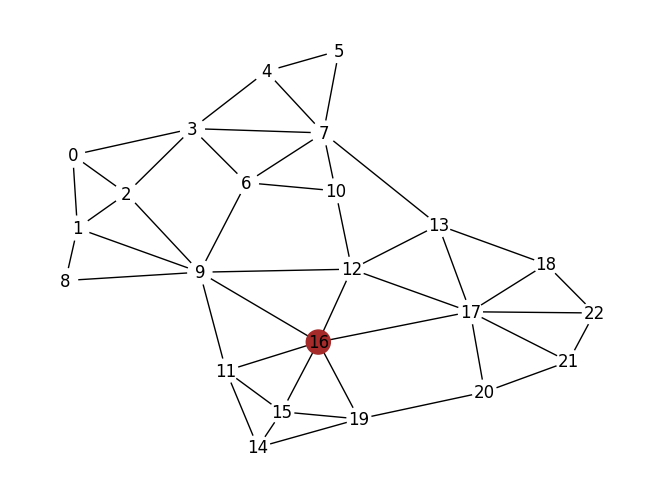

In [4]:
n_nodes = A.shape[0]

# Define a single output layer node
output_layer_nodes = np.zeros((n_nodes, 1))
output_layer_nodes[16] = 1
# Define the neighboring nodes to draw (none)
neighbor_nodes = np.zeros((n_nodes, 1))
print("Output layer:")
draw_graph_structure(A, output_layer_nodes, neighbor_nodes)

Let's imagine that we want to form a batch for a node labelling task that consists of just node 16 in the output layer (highlighted).   The network consists of the input, hidden layer 1, hidden layer2, and the output layer.

Hidden layer 2:


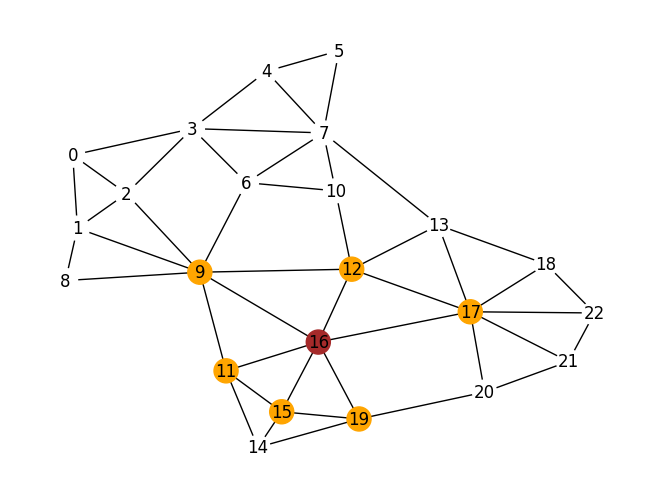

In [8]:
# TODO Find the nodes in hidden layer 2 that connect to node 16 in the output layer
# using the adjacency matrix
# Replace this line:
hidden_layer2_nodes = np.zeros((n_nodes, 1))
connected_nodes = np.where(A[:, 16] == 1)[0]
hidden_layer2_nodes[connected_nodes] = 1

print("Hidden layer 2:")
draw_graph_structure(A, output_layer_nodes, hidden_layer2_nodes)

Hidden layer 1:


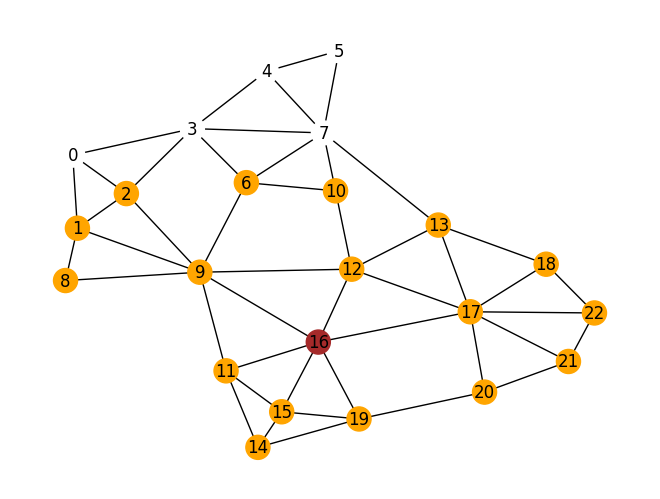

In [9]:
# TODO - Find the nodes in hidden layer 1 that connect that connect to node 16 in the output layer
# using the adjacency matrix
# Replace this line:
hidden_layer1_nodes = np.zeros((n_nodes, 1))
hidden_layer2_nodes = np.zeros((n_nodes, 1))

connected_nodes_layer2 = np.where(A[:, 16] == 1)[0]
hidden_layer2_nodes[connected_nodes_layer2] = 1
for node in connected_nodes_layer2:
    connected_nodes_layer1 = np.where(A[:, node] == 1)[0]
    hidden_layer1_nodes[connected_nodes_layer1] = 1

print("Hidden layer 1:")
draw_graph_structure(A, output_layer_nodes, hidden_layer1_nodes)

Input layer:


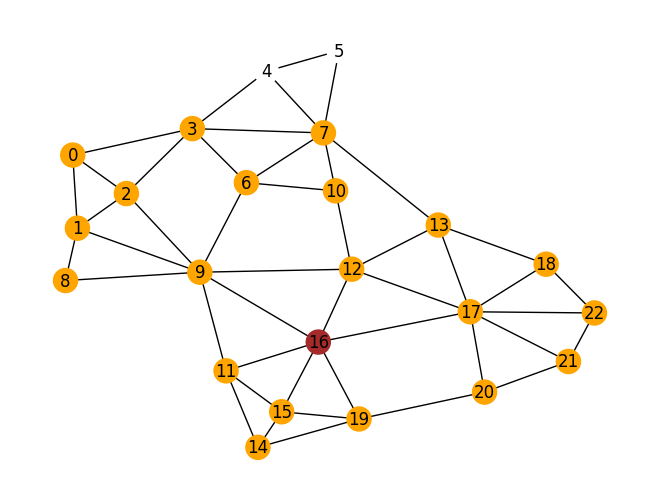

In [ ]:
# TODO Find the nodes in the input layer that connect to node 16 in the output layer
# using the adjacency matrix
# Replace this line:
input_layer_nodes = np.zeros((n_nodes, 1))

# 1. find the node from hidden layer 2 taht connect to output node 16
connected_to_output = np.where(A[:, 16] == 1)[0]

# 2. find the node from hidden layer 1 that connect to #1 in hidden layer 2
hidden_layer1_nodes = []
for node in connected_to_output:
    hidden_layer1_nodes.extend(np.where(A[:, node] == 1)[0])
hidden_layer1_nodes = np.unique(hidden_layer1_nodes)

# 3. find the node from input that connect to #2 in hidden layer 1
connected_nodes_input = []
for node in hidden_layer1_nodes:
    connected_nodes_input.extend(np.where(A[:, node] == 1)[0])
connected_nodes_input = np.unique(connected_nodes_input)

input_layer_nodes[connected_nodes_input] = 1

print("Input layer:")
draw_graph_structure(A, output_layer_nodes, input_layer_nodes)

This is bad news.  This is a fairly sparsely connected graph (i.e. adjacency matrix is mostly zeros) and there are only two hidden layers.  Nonetheless, we have to involve almost all the nodes in the graph to compute the loss at this output.

To resolve this problem, we'll use neighborhood sampling.  We'll start again with a single node in the output layer.

Output layer:


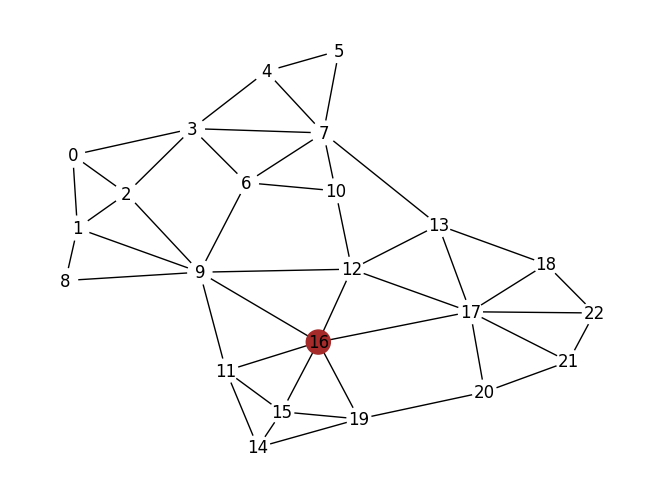

In [13]:
print("Output layer:")
draw_graph_structure(A, output_layer_nodes, neighbor_nodes)

In [14]:
# Define umber of neighbors to sample
n_sample = 3

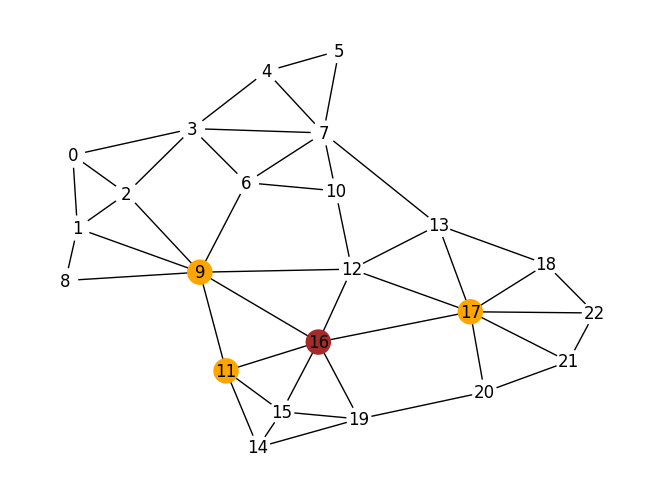

In [15]:
# TODO Find the nodes in hidden layer 2 that connect to node 16 in the output layer
# using the adjacency matrix.  Then sample n_sample of these nodes randomly without
# replacement.

# Replace this line:
connected_nodes_layer2 = np.where(A[:, 16] == 1)[0]

sampled_nodes = np.random.choice(connected_nodes_layer2, size=n_sample, replace=False)

hidden_layer2_nodes = np.zeros((n_nodes, 1))
hidden_layer2_nodes[sampled_nodes] = 1
draw_graph_structure(A, output_layer_nodes, hidden_layer2_nodes)

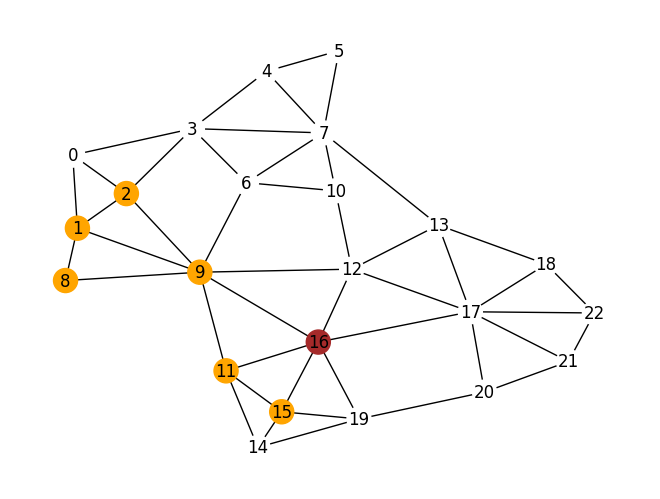

In [ ]:
# TODO Find the nodes in hidden layer 1 that connect to the nodes in hidden layer 2
# using the adjacency matrix.  Then sample n_sample of these nodes randomly without
# replacement.  Make sure not to sample nodes that were already included in hidden layer 2 our the output layer.
# The nodes at hidden layer 1 are the union of these nodes and the nodes in hidden layer 2

hidden_layer1_sampled_nodes = np.zeros((n_nodes, 1))

# Find nodes in hidden layer 1 that connect to nodes in hidden layer 2
connected_nodes_layer1_to_layer2 = []
for node in np.where(hidden_layer2_nodes == 1)[0]:
    connected_nodes_layer1_to_layer2.extend(np.where(A[:, node] == 1)[0])

connected_nodes_layer1_to_layer2 = np.unique(
    connected_nodes_layer1_to_layer2
)  # Remove duplicates

# Exclude nodes already in hidden layer 2 or the output layer
valid_nodes = [
    node
    for node in connected_nodes_layer1_to_layer2
    if hidden_layer2_nodes[node] == 0 and output_layer_nodes[node] == 0
]

# Randomly sample nodes without replacement
if len(valid_nodes) > n_sample:
    sampled_nodes = np.random.choice(valid_nodes, n_sample, replace=False)
else:
    sampled_nodes = valid_nodes  # If fewer valid nodes than n_sample, take all of them

hidden_layer1_sampled_nodes[sampled_nodes] = 1

# Combine sampled nodes with nodes already in hidden layer 2
hidden_layer1_combined_nodes = np.logical_or(
    hidden_layer1_sampled_nodes, hidden_layer2_nodes
).astype(int)

draw_graph_structure(A, output_layer_nodes, hidden_layer1_combined_nodes)

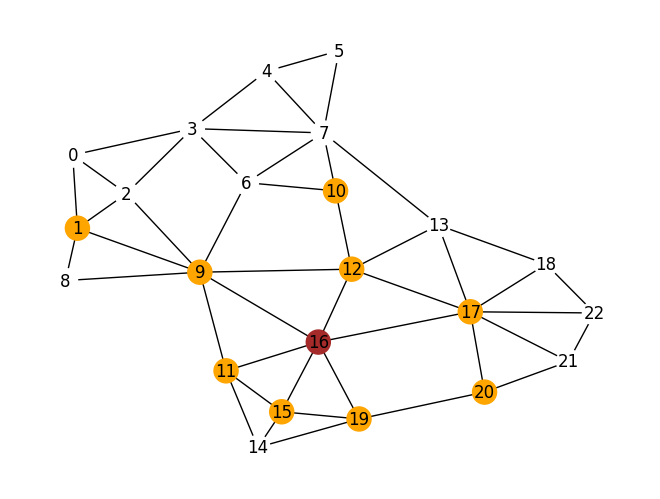

In [29]:
# TODO Find the nodes in the input layer that connect to the nodes in hidden layer 1
# using the adjacency matrix.  Then sample n_sample of these nodes randomly without
# replacement.  Make sure not to sample nodes that were already included in hidden layer 1,2, or the output layer.
# The nodes at the input layer are the union of these nodes and the nodes in hidden layers 1 and 2

# Replace this line:
connected_nodes_input = np.where(A[:, np.where(hidden_layer1_nodes == 1)[0]] == 1)[0]
connected_nodes_input = np.unique(connected_nodes_input)

excluded_nodes = np.union1d(
    np.where(hidden_layer1_nodes == 1)[0], np.where(hidden_layer2_nodes == 1)[0]
)
excluded_nodes = np.union1d(excluded_nodes, np.where(output_layer_nodes == 1)[0])
connected_nodes_input = np.setdiff1d(connected_nodes_input, excluded_nodes)

n_sample = 3

sampled_nodes_input = np.random.choice(connected_nodes_input, n_sample, replace=False)

input_layer_nodes = np.zeros((n_nodes, 1))
input_layer_nodes[sampled_nodes_input] = 1

input_layer_nodes[np.where(hidden_layer1_nodes == 1)[0]] = 1
input_layer_nodes[np.where(hidden_layer2_nodes == 1)[0]] = 1

draw_graph_structure(A, output_layer_nodes, input_layer_nodes)

If you did this correctly, there should be 9 yellow nodes in the figure.  The "receptive field" of node 16 in the output layer increases much more slowly as we move back through the layers of the network.

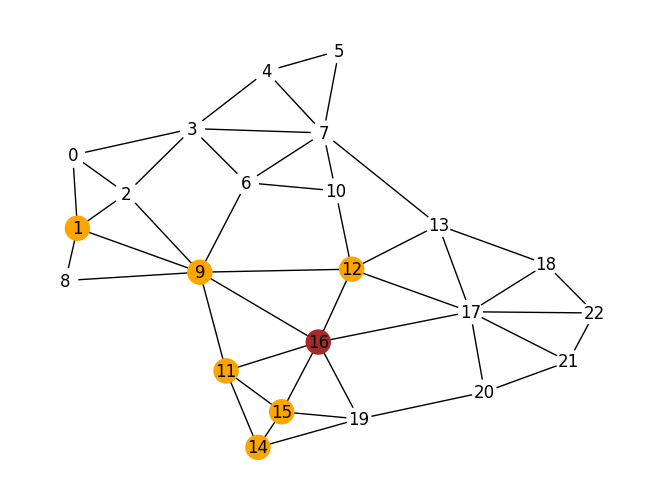

In [32]:
# TODO Find the nodes in hidden layer 1 that connect to the nodes in hidden layer 2
# using the adjacency matrix.  Then sample n_sample of these nodes randomly without
# replacement.  Make sure not to sample nodes that were already included in hidden layer 2 our the output layer.
# The nodes at hidden layer 1 are the union of these nodes and the nodes in hidden layer 2

# Replace this line:

nn = np.where(hidden_layer2_nodes == 1)[0]

hidden_layer1_nodes = np.zeros(n_nodes)

# merge all previous nodes
for idx in nn:
    hidden_layer1_nodes = np.array([max(a,b) for a,b in zip(hidden_layer1_nodes, A[idx])])

if len(hidden_layer1_nodes) > n_sample:
    selected = np.where(hidden_layer1_nodes == 1)[0]
    selected = np.setdiff1d(selected, nn)
    prob = np.ones(len(selected))/len(selected)
    hidden_layer1_nodes = np.random.choice(selected, size=n_sample, p=prob, replace=False)

output_hidden_layer1 = np.zeros(n_nodes)
np.put(output_hidden_layer1, hidden_layer1_nodes, 1)
np.put(output_hidden_layer1, nn, 1)

draw_graph_structure(A, output_layer_nodes, output_hidden_layer1)

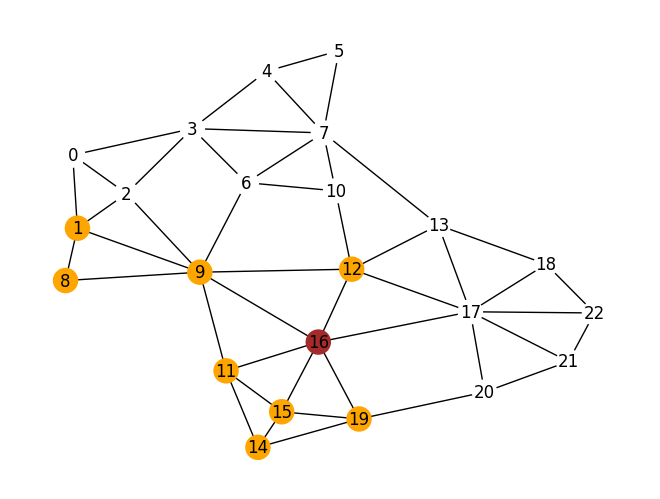

In [33]:
# TODO Find the nodes in the input layer that connect to the nodes in hidden layer 1
# using the adjacency matrix.  Then sample n_sample of these nodes randomly without
# replacement.  Make sure not to sample nodes that were already included in hidden layer 1,2, or the output layer.
# The nodes at the input layer are the union of these nodes and the nodes in hidden layers 1 and 2

# Replace this line:

nn = np.where(output_hidden_layer1 == 1)[0]

input_layer_nodes = np.zeros(n_nodes)

# merge all previous nodes
for idx in nn:
    input_layer_nodes = np.array([max(a,b) for a,b in zip(input_layer_nodes, A[idx])])

if len(input_layer_nodes) > n_sample:
    selected = np.where(input_layer_nodes == 1)[0]
    selected = np.setdiff1d(selected, nn)
    prob = np.ones(len(selected))/len(selected)
    input_layer_nodes = np.random.choice(selected, size=n_sample, p=prob, replace=False)

output_input = np.zeros(n_nodes)
np.put(output_input, input_layer_nodes, 1)
np.put(output_input, nn, 1)


draw_graph_structure(A, output_layer_nodes, output_input)